$\qquad$ $\qquad$$\qquad$  **TDA 231 Machine Learning: Homework 1** <br />
$\qquad$ $\qquad$$\qquad$ **Goal: Maximum likelihood estimation (MLE), Maximum a posteriori (MAP)**<br />
$\qquad$ $\qquad$$\qquad$                   **Grader: Vasileios** <br />
$\qquad$ $\qquad$$\qquad$                     **Due Date: 16/4** <br />
$\qquad$ $\qquad$$\qquad$                   **Submitted by: Name, Personal no., email** <br />
$\qquad$ $\qquad$$\qquad$                   ** Armand Ghaffarpour, 9101103738, armandg@student.chalmers.se**  <br />
$\qquad$ $\qquad$$\qquad$                   ** Ryan Damarputra Widjaja, 9002205616, ryand@student.chalmers.se** <br />

General guidelines:
* All solutions to theoretical problems, can be submitted as a single file named *report.pdf*. They can also be submitted in this ipynb notebook, but equations wherever required, should be formatted using LaTeX math-mode.
* All discussion regarding practical problems, along with solutions and plots should be specified here itself. We will not generate the solutions/plots again by running your code.
* Your name, personal number and email address should be specified above and also in your file *report.pdf*.
* All datasets can be downloaded from the course website.
* All tables and other additional information should be included.

# Theoretical problems

## [Maximum likelihood estimator (MLE), 4 points]

Consider a dataset $x_1, \ldots, x_n$ consisting of i.i.d. observations 
generated from a **spherical** multivariate Gaussian distribution $N(\mu, \sigma^2I)$, where $\mu \in \mathbb{R}^p$, $I$ 
is the $p \times p$ identity matrix, and $\sigma^2$ is a
scalar. Derive the maximum likelihood estimator for $\sigma$.

## [Posterior distributions, 6 points]

Consider dataset $x_1, \ldots, x_n $ consisting of i.i.d. observations 
generated from a **spherical** multivariate Gaussian distribution $N(\mu, \sigma^2I)$, where $\mu =
[\mu_{1},\, \mu_{2}]^{\top} \in \mathbb{R}^2$, $I$ 
is the $2 \times 2$ identity matrix, and $\sigma^2$ is a scalar. 
The probability distribution of a point $\mathbf{x}=[x_{1},\, x_{2}]^{\top}$ is given by

$$ P(X = x \,|\, \sigma^{2}) =  \frac{1}{ 2\pi \sigma^2}   \exp
\left( -\frac{ (x - \mu)^{\top}(x - \mu) }{2\sigma^{2}} \right)
~.$$

We assume that $\sigma^{2}$ has an **inverse-gamma** prior distribution
given by
$$ P(\sigma^{2} = s | \alpha, \beta) =
\frac{\beta^{\alpha}}{\Gamma(\alpha)} s^{-\alpha-1} \exp\left( -
  \frac{\beta}{s}\right)~. \tag{1} $$
  
where $\alpha$ and $\beta$ are parameters and $\Gamma(\cdot)$ is the
gamma function given by $\Gamma(x) = \int_{0}^{\infty} t^{x-1} e^{-t}
dt $.

1. Derive the posterior distribution $p(\sigma^{2} = s | x_{1} , \ldots, x_{n}; \alpha, \beta)$. (HINT: inverse-gamma distribution is conjugate prior to sphericalGaussian distribution when mean is known).

2. Assume $\mu$ is known and consider two separate models (having different parameters)

    * $\alpha =1$ and $\beta=1$ (Model $M_{A}$)
    * $\alpha = 10$ and $\beta= 1$ (Model $M_{B}$) 

Compute analytically the expression for the MAP estimate for both models in terms of posterior parameters referred to as $\alpha_{1}, \beta_{1}$.

# Theoritical solutions

## [Maximum likelihood estimator (MLE)]

According to the description, $\mu$ is a vector with $p$ dimensions, and we have dataset $x_1 ,.., x_n$ generated with spherical multivariate Gaussian distribution $N(\mu, \sigma^2I)$. From this, the covariance matrix will be $\sigma^2I$, with $I$ is an identity $p \times p$ matrix. The inverse of the covariance matrix can be easily derived as $\frac{1}{\sigma^2}$ since $\Sigma*\Sigma^{-1} = I$

This is the original formula for multivariate Gaussian distribution : 

$$ N(x\,|\,\mu,\Sigma) = \frac{1}{(2\pi)^{D/2}|\Sigma|^{1/2}} \exp\left( -\frac{1}{2} (x-\mu)^T\Sigma^{-1}(x-\mu) \right)~ $$

We can plug everything that we know into the function above, resulting in : 

$$ N(x\,|\,\mu,\Sigma) = \frac{1}{(2\pi)^{p/2}((\sigma^2)^p)^{1/2}} \exp\left( -\frac{(x-\mu)^T(x-\mu)}{2\sigma^2} \right)~ $$

$$ N(x\,|\,\mu,\Sigma) = \frac{1}{(2\pi)^{p/2}\sigma^p} \exp\left( -\frac{(x-\mu)^T(x-\mu)}{2\sigma^2} \right)~ $$

This is the PDF function for a single point, and in order to get the likelihood, we need to multiply the PDF of every single point in the dataset. Let $f$ be the likelihood function : 

$$ f = \prod_{i=1}^{n} \frac{1}{(2\pi)^{p/2}\sigma^p} \exp\left( -\frac{(x_i-\mu)^T(x_i-\mu)}{2\sigma^2} \right)~ $$

$$ f = \frac{1}{(2\pi)^{np/2}\sigma^{np}} \exp\left( -\frac{\sum_{i=1}^{n}(x_i-\mu)^2}{2\sigma^2} \right)~ $$

To make our lifes easier, we will put both sides on logarithmic, resulting in this : 

$$ \ln f = \ln \left(\frac{1}{(2\pi)^{np/2}\sigma^{np}} \exp\left( -\frac{\sum_{i=1}^{n}(x_i-\mu)^2}{2\sigma^2} \right)~\right)~ $$

$$ \ln f = -\frac{n}{2}p \ln (2\pi) - np \ln(\sigma) - \frac{\sum_{i=1}^{n}(x_i-\mu)^2}{2\sigma^2}$$

By doing partial derivatives on $\ln f$ with respect to $\mu$ and set them to zero, we can obtain the MLE for $\mu$ : 

$$ \frac{\partial (\ln f)}{\partial \mu} = \frac{\sum_{i=1}^{n}x_i-\mu}{\sigma^2} = 0 $$

Since we know that $\sigma^2$ must be non-zero, the numerator must be zero : 

$$ \sum_{i=1}^{n}x_i-\mu = 0 $$

From here, we can get our MLE for $\mu$ as :

$$ \hat{\mu} = \frac{\sum_{i=1}^{n}x_i}{n} $$

We can do the same thing for getting MLE for $\sigma$, but we will do partial derivation with respect to $\sigma$ instead : 

$$ \frac{\partial (\ln f)}{\partial \sigma} = \frac{-np}{\sigma} + \frac{\sum_{i=1}^{n}(x_i-\mu)^2}{\sigma^3} = 0 $$

$$ \frac{-np\sigma^2 +\sum_{i=1}^{n}(x_i-\mu)^2 }{\sigma^3} = 0$$

Again, we know that $\sigma^3$ must be a non zero, so the equation above becomes : 

$$ -np\sigma^2 +\sum_{i=1}^{n}(x_i-\mu)^2 = 0$$

Thus, solving the equation above will yield our MLE for $\sigma$ : 

$$ \hat{\sigma} = \sqrt{\frac{\sum_{i=1}^{n}(x_i - \mu)^2}{np}}$$

# [Posterior Distribution]

Assuming that the mean is known, then we know that the posterior will also be an inverse-gamma distribution. In order to define the posterior distribution, we need both prior distribution and the likelihood function.

The likelihood function is just the product of the probabilities of all datasets. Let $f$ be the likelihood function : 

$$f = \prod_{i=1}^{n} \frac{1}{ 2\pi \sigma^2}   \exp
\left( -\frac{ (x - \mu)^{\top}(x - \mu) }{2\sigma^{2}} \right)
~ $$

$$f = \left(\frac{1}{2\pi \sigma^2}\right)^n~ \exp \left(-\frac{1}{2\sigma^2} \sum_{i=1}^{n}(x_i - \mu)^T(x_i-\mu)\right)~$$

Since the posterior is also an inverse-gamma distribution, then the posterior will be proportional to prior times likelihood. Assuming that $\sigma^2 = s$, the equation for this will be : 

$$Posterior \propto (Prior) . (Likelihood)$$

$$Posterior \propto \left(s^{-\alpha-1} \exp(\frac{-\beta}{s})\right)~ . \left(\frac{1}{s^n} \exp(-\frac{1}{2s}\sum_{i=1}^{n}(x_i - \mu)^T(x_i-\mu))\right)~ $$

$$Posterior \propto s^{-(\alpha+n)-1} . \exp\left(\frac{-\beta}{s} - \frac{1}{2s}\sum_{i=1}^{n}(x_i - \mu)^T(x_i-\mu)\right)~$$

$$Posterior \propto s^{-(\alpha+n)-1} . \exp\left(-\frac{(\beta + \frac{1}{2}\sum_{i=1}^{n}(x_i - \mu)^T(x_i-\mu))}{s}\right)~$$

From here, we can derive our $\alpha$ and $\beta$ for the posterior distribution, lets call them $\alpha_1$ and $\beta_1$ : 

$$ \alpha_1 = \alpha+n $$
$$ \beta_1 = \beta + \frac{1}{2}\sum_{i=1}^{n}(x_i - \mu)^T(x_i-\mu) $$

MAP is just the mode from the posterior distributions. Since our posterior is an inverse-gamma distribution, then we can calculate the MAP by : 

$$\frac{\beta_1}{\alpha_1+1}$$ with $\alpha_1$ and $\beta_1$ is the parameter for the posterior distribution, which we have defined in the above.

So, for model A : 

$$\alpha_{1A} = 1 + n$$

$$\beta_{1A} = 1 + \frac{1}{2}\sum_{i=1}^{n}(x_i - \mu)^T(x_i-\mu)$$

Plugging these into the MAP function, we have : 

$$MAP_A = \frac{1 + \frac{1}{2}\sum_{i=1}^{n}(x_i - \mu)^T(x_i-\mu)}{2+n}$$

Same thing for model B : 

$$\alpha_{1B} = 10 + n$$

$$\beta_{1B} = 1 + \frac{1}{2}\sum_{i=1}^{n}(x_i - \mu)^T(x_i-\mu)$$

$$MAP_B = \frac{1 + \frac{1}{2}\sum_{i=1}^{n}(x_i - \mu)^T(x_i-\mu)}{11+n}$$


# Practical problems

**Useful python libraries/functions:**
* **General:**  shape, reshape, np.mean etc.
* **Plotting:** plot, scatter, legend, hold, imshow, subplot,
  grid, title etc.

## [Spherical Gaussian estimation, 5 points]

Consider a dataset consisting of i.i.d. observations
generated from a spherical Gaussian distribution $N(\mu, \sigma^2I)$, where $\mu \in \mathbb{R}^p$, $I$ 
is the $p \times p $ identity matrix, and $\sigma^2$ is a scalar.

(a) Write the mathematical expression for the MLE estimators for $\mu$ and $\sigma$ in above setup. (HINT: Use latex equations here, or mention in pdf. This [link](http://data-blog.udacity.com/posts/2016/10/latex-primer/) might be useful if you choose to write here).

$$\hat{\mu} = \frac{\sum_{i=1}^{n} x_i}{n}$$

$$\hat{\sigma} = \sqrt{\frac{\sum_{i=1}^{n}(x_i - \mu)^2}{np}}$$

(b) Implement a function **sge()** that estimates the mean $\mu$ and variance $\sigma^{2}$ from the given data, using the skeleton code provided below. Note: You cannot use **numpy.cov** and **numpy.mean** or any other functions for calculating the mean and variance.

(c) Implement a function **myplot1()** which takes as input a two-dimensional dataset $x$ (as described above); and draws, on the same plot, the following:
1. A scatter plot of the original data $x$, 
2. Circles with center $\mu$ and radius $r=k \sigma$ for $k=1, 2, 3$ where $\mathbf{\mu}$ and $\sigma^{2}$ denote the mean and variance estimated using **sge()**. 
3. Legend for each circle indicating the fraction of points (in the original dataset) that lie outside the circle boundary.

(d) Load 'dataset0.txt' and run your code using only the first two features of the dataset. Submit the resulting plot as well as your implementation here.

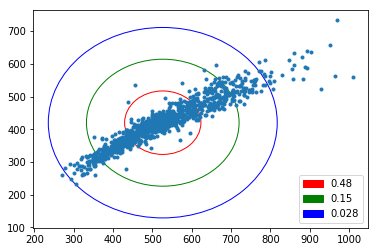

In [182]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches




def myplot1(X,mu,sigma):
    xlist = X[:,0]
    ylist = X[:,1]
    
    XX,YY = np.meshgrid(xlist,ylist)
    
    circle = plt.Circle((mu[0],mu[1]),sigma,color='r',fill=False)
    circle2 = plt.Circle((mu[0],mu[1]),2*sigma,color='g',fill=False)
    circle3 = plt.Circle((mu[0],mu[1]),3*sigma,color='b',fill=False)
    
    
    fig,ax = plt.subplots()
    ax.add_patch(circle)
    ax.add_patch(circle2)
    ax.add_patch(circle3)
    
    
    c1 = 0 
    c2 = 0
    c3 = 0
    nbrOfDots = X.shape[0]
    for i in range(0,nbrOfDots):
        dist = np.linalg.norm(mu-X[i])
        if dist >= 3*sigma :
            c3 += 1
            c2 += 1
            c1 += 1
        elif dist >= 2*sigma:
            c2 += 1
            c1 += 1
        elif dist >= 1*sigma:
            c1 += 1
            
    plt.plot(xlist,ylist,".")
    
    blue_patch = mpatches.Patch(color ='blue', label = round(c3/nbrOfDots,3))
    green_patch = mpatches.Patch(color='green', label= round(c2/nbrOfDots,3))
    red_patch = mpatches.Patch(color='red', label= round(c1/nbrOfDots,3))
    plt.legend(handles=[red_patch,green_patch,blue_patch])

def sge(X):
    n = X.shape[0]
    p = X.shape[1]
    
    mu = np.sum(X,axis=0)/n
    stemp = 0
    
    for i in range(0,n):
        stemp += np.dot(np.transpose(X[i]-mu),X[i]-mu)

    sigma = np.sqrt(stemp / (n*p))
    return mu,sigma

X = np.loadtxt("dataset0.txt",usecols=(0,1))
m,s = sge(X)


myplot1(X,m,s)

## [MAP estimation, 5 points]

Consider dataset $x_1, \ldots, x_n $ consisting of i.i.d. observations 
generated from a multivariate normal distribution $N(\mu, \sigma^2I)$, where $\mu =
[\mu_{1},\, \mu_{2}]^{\top} \in \mathbb{R}^2$, $I$ 
is the $2 \times 2$ identity matrix, and $\sigma^2$ is a scalar. We will now explore the Bayesian approach to estimation of $\sigma^{2}$ *under the assumption that the mean $\mu$ is known.*
The probability distribution of a point $\mathbf{x}=[x_{1},\, x_{2}]^{\top}$ is given by

$$ P(X = x \,|\, \sigma^{2}) =  \frac{1}{ 2\pi \sigma^2}   \exp
\left( -\frac{ (x - \mu)^{\top}(x - \mu) }{2\sigma^{2}} \right)
~.$$

We assume that $\sigma^{2}$ has an **inverse-gamma** prior distribution
given by
$$ P(\sigma^{2} = s | \alpha, \beta) =
\frac{\beta^{\alpha}}{\Gamma(\alpha)} s^{-\alpha-1} \exp\left( -
  \frac{\beta}{s}\right)~. \tag{1} $$
  
where $\alpha$ and $\beta$ are parameters and $\Gamma(\cdot)$ is the
gamma function given by $\Gamma(x) = \int_{0}^{\infty} t^{x-1} e^{-t}
dt $.

Assume that your dataset now consists of just the first two features of 'dataset0.txt'.

(a) Choose $\mu$ to be the empirical mean. Implement a function **myplot2()**, that on the same plot, shows the prior and posterior distributions for $\sigma$ with parameters $\alpha = 1 $ and $\beta = 1$.  Generate a second plot with $\alpha=10$ and $\beta=1$. What do you observe?

HINT:
   * Calculate the posterior distribution using the data and the formula that you derived in the theoretical question **"Posterior distributions"**.
   * You might want to check out the "log-sum-exp trick".

[0.0, 3.356760721622319e-220, 2.2140851891335078e-147, 2.219180712473709e-110, 5.252984719028626e-88, 5.0018750801902947e-73, 2.6468503726161166e-62, 2.983759785483143e-54, 5.497664258626287e-48, 5.652003167626763e-43, 7.099803749428511e-39, 1.8399354606489923e-35, 1.4146958707061566e-32, 4.185068319394024e-30, 5.764896485125777e-28, 4.267162429347519e-26, 1.8938728356289477e-24, 5.488741733967801e-23, 1.1111280469917335e-21, 1.658207201393038e-20, 1.9057012140469797e-19, 1.7479338563382403e-18, 1.3178466778921214e-17, 8.37054886543345e-17, 4.572590078213775e-16, 2.1861457948757838e-15, 9.284710981061887e-15, 3.547884643028641e-14, 1.2332658731736458e-13, 3.9370118908963183e-13, 1.1638618273765964e-12, 3.2093088269900575e-12, 8.307395488246493e-12, 2.0300324341721672e-11, 4.706384499842993e-11, 1.039773842666368e-10, 2.1977071629054802e-10, 4.4597625483301964e-10, 8.716426921941251e-10, 1.6454551312278866e-09, 3.0079406639789736e-09, 5.336990099261093e-09, 9.210463197914395e-09, 1.5490

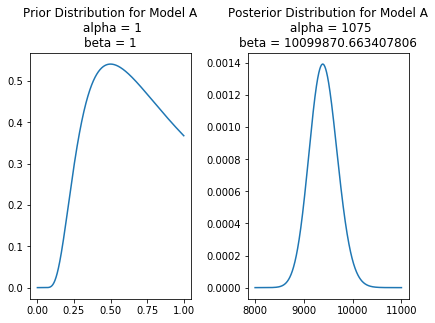

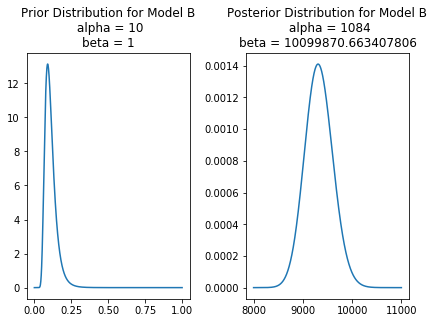

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
from scipy.special import gamma
from scipy.stats import invgamma


def myplot2(n,X, alpha, beta,mu,model):
    #prior
    
    #speculate the s values
    s = np.linspace (0.001,1,n)
    s2 = np.linspace(8000,11000,n)
    
    #container for the prior function values
    sigma = []
    postsigma = []
    
    #calculate gamma function
    gm = gamma(alpha)
    
    #calculate the beta power
    factor = np.power(beta,alpha)
    
    #power of s
    powerofs = -alpha-1
    
    #calculate the prior distribution for each point in s
    for i in range(0,n):
        priorgamma = (factor / gm) * np.power(s[i],powerofs) * np.exp(-beta / s[i])
        sigma.append(priorgamma)
    
    #calculate the alpha and beta for the posterior
    print(sigma)
    postalpha = alpha + n
    stemp = 0
    xlist = X[:,0]
    ylist = X[:,1]
    
    for i in range(0,n):
        x = np.array([xlist[i],ylist[i]])
        dif = np.power(np.linalg.norm(x-mu),2)
        res = np.divide(dif,2)
        stemp += res
    postbeta = beta + stemp
    
    #plot both the prior and posterior distributions
    f, ((X1,X2)) = plt.subplots(1,2)
    X1.plot(s,sigma)
    X2.plot(s2,invgamma.pdf(s2,postalpha,scale=postbeta))
    plt.tight_layout()
    X1.set_title("Prior Distribution for Model {}\n alpha = {}\nbeta = {}".format(model,alpha,beta))
    X2.set_title("Posterior Distribution for Model {}\n alpha = {}\nbeta = {}".format(model,postalpha,postbeta))
    
X = np.loadtxt("dataset0.txt",usecols=(0,1))
n = X.shape[0]
mu = np.sum(X,axis=0)/n
myplot2(n,X,1,1,mu,"A")
myplot2(n,X,10,1,mu,"B")

# Observation

Under the assumption that $\mu$ is known, inverse-gamma distribution is conjugate prior to Gaussian distribution. That means our posterior distribution will belong to the same family as the prior distribution : inverse-gamma distribution. Since the $\sigma^2$ has an inverse-gamma distribution, that means the possible values of $\sigma^2$ can be predicted with just $\alpha$ and $\beta$ values. In our case, just by changing $\alpha$ from 1 to 10, the distribution peak has shifted to the left. That means the possible $\sigma^2$ values are decreasing. When the $\alpha$ value is too big, the $\sigma^2$ is close to zero.

We don't see any changes in the posterior distribution. Again, we know by conjugacy that the posterior will also be an inverse-gamma distribution. However when we derived $\alpha_1$ and $\beta_1$ for the posterior, we found out that their values will be influenced by the dataset. Specifically, the $\alpha_1$ will be influenced by the number of datas in a dataset, and the $\beta_1$ will be influenced by the difference of each point in the dataset and the mean. In a large dataset, this will result in a very large number and their values will overshadowed both $\alpha$ and $\beta$. Thus, no matter which $\alpha$ and $\beta$ values that we put in, the posterior distribution will stay the same.